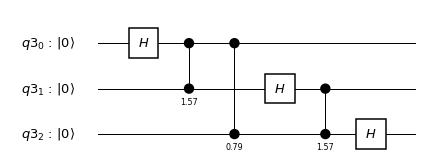

In [13]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.tools.visualization import matplotlib_circuit_drawer, qx_color_scheme
import math

# Quantum Fourier Transform
def construct_circuit(num_qubits):
    q = QuantumRegister(num_qubits)
    circ = QuantumCircuit(q)
 
    for j in range(num_qubits):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), q[j], q[k])
        circ.h(q[j])

    return circ

matplotlib_circuit_drawer(construct_circuit(3))

In [14]:
from mpl_toolkits.mplot3d import axes3d    

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
%matplotlib inline

In [15]:
df = pd.read_csv('benchmark_data.csv')

NUM_QUBITS = 24

# Pandas Conditions
qiskit = df['name'] == 'bench_qiskit'
qcgpu = df['name'] == 'bench_qcgpu'
projectq = df['name'] == 'bench_projectq'

# Get mean values
means_qcgpu = []
means_qiskit = []
means_projectq = []

for i in range(NUM_QUBITS):
    means_qcgpu.append(df[qcgpu & (df['num_qubits'] == i+1)]['time'].mean())
    means_qiskit.append(df[qiskit & (df['num_qubits'] == i+1)]['time'].mean())
    means_projectq.append(df[projectq & (df['num_qubits'] == i+1)]['time'].mean())

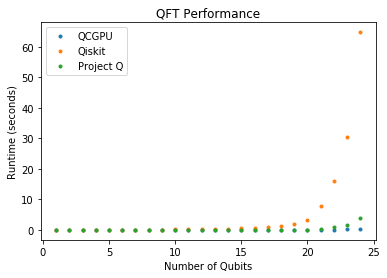

In [16]:
xdata = np.arange(1, NUM_QUBITS + 1)

plt.plot(xdata, means_qcgpu, ".", label="QCGPU")
plt.plot(xdata, means_qiskit, ".", label="Qiskit")
plt.plot(xdata, means_projectq, ".", label="Project Q")

# def model_func(x, o, c):
#     return ((x ** 2 + x) / 2) * o * (2 ** x) + c

# popt, pcov = curve_fit(model_func, xdata, means_qiskit)

# plt.plot(xdata, model_func(xdata, *popt), label="Fitted Curve")

plt.legend()
plt.title('QFT Performance')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.show()
